##**Introduction**

this notebook implements classification and psychological analysis on health care workers during the time of pandemic


**Data Description:**

*   ***psych_data.csv***: contains the data used
*   each row represent a healthcare worker
*   ***SCL_Label***: this is a target variable it was calculated using SCL-90 psychological scale by a researcher. this column consists of 2 classes **High** and **Low**
*   Rest of the features are based on social and demographic informtion of healthcare workers




**Goal:** Predict the likelihood of psychological impact on healthcare worker

# **Exploratory Data Analysis and Preprocessing**

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import datetime
import torch
import torch.nn as nn
from tensorflow import keras
import tensorflow as tf
from yellowbrick.target import FeatureCorrelation




import pandas as pd
from tkinter import filedialog
import os
from os import listdir
from os.path import isfile, join
from scipy.stats import zscore
import torch
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import KFold



from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df =pd.read_csv('/content/gdrive/My Drive/psych_data.csv')
df.head()

,Unnamed: 0,Number,Age,Gender,The only child,Place of residence,Town or country,Education,Occupation,Post,...,SCL_86,SCL_87,SCL_88,SCL_89,SCL_90,SCL_Sum,GSI,SCL_ZScore,SCL_TScore,SCL_Label
0,0,1,18,2,2,11,1,2,4,1,...,2,1,1,1,1,108,1.200000,-0.220480,47.795205,Low
1,1,2,18,2,1,13,1,2,4,2,...,1,1,1,1,1,91,1.011111,-0.618004,43.819963,Low
2,2,3,19,2,1,4,1,2,6,2,...,5,4,4,3,5,294,3.266667,4.128903,91.289029,High
3,3,4,19,2,2,3,1,2,4,2,...,1,1,1,1,1,91,1.011111,-0.618004,43.819963,Low
4,4,5,19,2,2,13,2,2,4,2,...,4,4,4,4,4,332,3.688889,5.017486,100.174863,High


In [ ]:
data = data.drop(['SCL_Sum'], axis = 1)
data = data.drop(['SCL_ZScore'], axis = 1)
data = data.drop(['SCL_TScore'], axis = 1)
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.drop(['GSI'], axis = 1)
data = data.drop(['Place of residence'], axis = 1)
data = data.drop(['Employment type'], axis = 1)
data.set_index('Number', inplace=True)

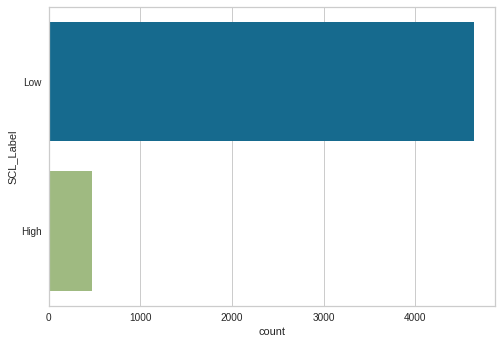

In [ ]:
ax1 = sns.countplot(y=df['SCL_Label'], data=df, linewidth=2)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA()
#pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=[data["SCL_Label"]])
plt.legend(handles=plot.legend_elements()[0], labels=list(data['SCL_Label']))
plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X= sample_data.iloc[: , :-1]
y= sample_data.iloc[:, -1]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=sample_data["SCL_Label"],
                 labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()

In [ ]:
df3['SOM'] = df['Headaches (SOM)'].append((df['Faintness or dizziness (SOM)'],
                                         df['Pains in heart or chest (SOM)'],
                                         df['Pains in lower back (SOM)'],
                                         df['Nausea or upset stomach (SOM)'],
                                         df['Soreness of your muscles (SOM)'],
                                         df['Trouble getting your breath (SOM)'],
                                         df['Hot or cold spells (SOM)'],
                                         df['Numbness or tingling in parts of your body (SOM)'],
                                         df['A lump in your throat (SOM)'],
                                         df['Feeling weak in parts of your body (SOM)'],
                                         df['Heavy feelings in your arms or legs (SOM)']), ignore_index=True)

In [ ]:
df3['ANX'] = df['Nervousness or shakiness inside (ANX)'].append((df['Trembling (ANX)'],
                                         df['Suddenly scared for no reason (ANX)'],
                                         df['Feeling fearful (ANX)'],
                                         df['Heart pounding or racing (ANX)'],
                                         df['Feeling tense or keyed up (ANX)'],
                                         df['Spells of terror or panic (ANX)'],
                                         df['Feeling so restless you couldn’t sit still (ANX)'],
                                         df['Feeling that familiar things are strange or unreal (ANX)'],
                                         df['Feeling pushed to get things done (ANX)']), ignore_index=True)
                                         #df['Feeling weak in parts of your body (SOM)'],
                                         #df['Heavy feelings in your arms or legs (SOM)']), ignore_index=True)

In [ ]:
df3['OC'] = df['Unwanted thoughts or ideas that won’t leave your head (OC)'].append((df['Trouble remembering things (OC)'],
                                         df['Worried about sloppiness or carelessness (OC)'],
                                         df['Feeling blocked in getting things done (OC)'],
                                         df['Having to do things very slowly (OC)'],
                                         df['Difficulty making decisions (OC)'],
                                         df['Your mind going blank (OC)'],
                                         df['Trouble concentrating (OC)'],
                                         df['Having to repeat the same actions such as touching, counting, washing (OC)']), ignore_index=True)

In [ ]:
df3['DEP'] = df['Loss of sexual interest or pleasure (DEP)'].append((df['Feeling low in energy or slowed down (DEP)'],
                                         df['Thoughts of ending life (DEP)'],
                                         df['Crying easily (DEP)'],
                                         df['Feeling of being trapped or caught (DEP)'],
                                         df['Blaming yourself for things (DEP)'],
                                         df['Feeling lonely (DEP)'],
                                         df['Feeling blue (DEP)'],
                                         df['Worrying too much about things (DEP)'],
                                         df['Feeling no interest in things (DEP)'],
                                         df['Feeling hopeless about the future (DEP)'],
                                         df['Thoughts of death or dying (DEP)'],
                                         df['Feeling everything is an effort (DEP)'],
                                         df['Feeling of worthlessness (DEP)']), ignore_index=True)

In [ ]:
df3['IS'] = df['Feeling critical of others (IS)'].append((df['Feeling shy or uneasy with the opposite sex (IS)'],
                                         df['Your feelings being easily hurt (IS)'],
                                         df['Feeling others do not understand you or are unsympathetic (IS)'],
                                         df['Feeling that people are unfriendly (IS)'],
                                         df['Feeling inferior to others (IS)'],
                                         df['Feeling uneasy when people are watching or talking about you (IS)'],
                                         df['Feeling very self-conscious with others (IS)'],
                                         df['Feeling uncomfortable about eating or drinking in public (IS)']), ignore_index=True)

In [ ]:
df3['PSY'] = df['The idea that someone else can control your thoughts (PSY)'].append((df['Hearing voices that other people do not hear (PSY)'],
                                         df['Other people being aware of your private thoughts (PSY)'],
                                         df['Having thoughts that are not your own (PSY)'],
                                         df['Feeling lonely even when you are with people (PSY)'],
                                         df['Having thoughts about sex that bother you a lot (PSY)'],
                                         df['The idea that you should be punished for your sins (PSY)'],
                                         df['The idea that something serious is wrong with your body (PSY)'],
                                         df['Never feeling close to another personal (PSY)'],
                                         df['The idea that something is wrong with your mind (PSY)']), ignore_index=True)

In [ ]:
df3['PI'] = df['Feeling others are to blame for most of your troubles (PI)'].append((df['Feeling that most people cannot be trusted (PI)'],
                                         df['Feeling that you are watched or talked about by others (PI)'],
                                         df['Having ideas or beliefs that others do not share (PI)'],
                                         df['Others not giving you proper credit for your achievements (PI)'],
                                         df['Feeling that people will take advantage of you if you let them (PI)']), ignore_index=True)

In [ ]:
df3['ANG_HOS'] = df['Feeling easily annoyed or irritated (ANG-HOS)'].append((df['Temper outbursts that you could not control (ANG-HOS)'],
                                         df['Having urges to beat, injure or harm someone (ANG-HOS)'],
                                         df['Having urges to break or smash things (ANG-HOS)'],
                                         df['Getting into frequent arguments (ANG-HOS)'],
                                         df['Shouting or throwing things (ANG-HOS)']), ignore_index=True)

In [ ]:
df3['PHOB'] = df['Feeling afraid in open spaces or on the street (PHOB)'].append((df['Feeling afraid to go out of your house alone (PHOB)'],
                                         df['Feeling afraid to travel on buses, subways or trains (PHOB)'],
                                         df['Having to avoid certain things, places or activities (PHOB)'],
                                         df['Feeling uneasy in crowds such as shopping or at a movie (PHOB)'],
                                         df['Feeling nervous when you are left alone (PHOB)'],
                                         df['Feeling afraid you will faint in public (PHOB)']), ignore_index=True)

In [ ]:
df3['SUM'] = df['SCL_Sum']

In [ ]:
df3['Label'] = df['SCL_Label']

In [ ]:
df3 = df3.drop(['SUM'], axis = 1)

In [ ]:
df4.tail()

,SOM,ANX,OC,DEP,IS,PSY,PI,ANG_HOS,PHOB
Number,,,,,,,,,
5104,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5105,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5107,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5108,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Exploring different psychological issues w.r.t two classes**

In [ ]:
h_df3 = df3.loc[df3['Label'] == 'High']

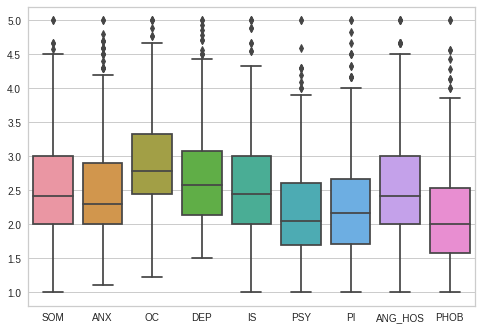

In [ ]:
ax = sns.boxplot(data=h_df3)

In [ ]:
l_df3 = df3.loc[df3['Label'] == 'Low']

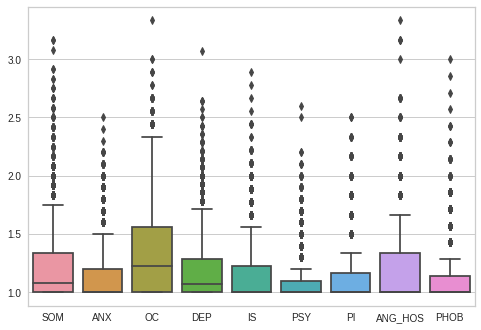

In [ ]:
ax = sns.boxplot(data=l_df3)

**Checking for feature independence using Chi-Square method before applying explainable AI**

In [ ]:
# train test spliy
X= df.iloc[: , :-1]
y= df.iloc[:, -1]

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
df.to_csv('chi_sq.csv')

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

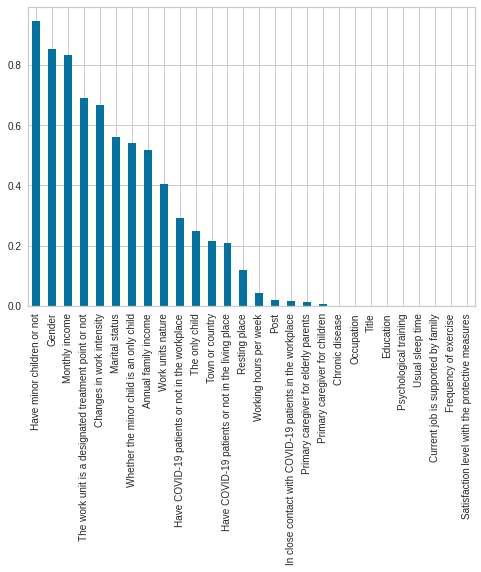

In [ ]:
p_values.plot.bar()

# Model Building

In [ ]:
# train test spliy
X= data.iloc[: , :-1]
y= data.iloc[:, -1]

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
x_tensor =  torch.from_numpy(train_x.values).float()
y_tensor =  torch.from_numpy(train_y.values.ravel()).float()
xtest_tensor =  torch.from_numpy(test_x.values).float()
ytest_tensor =  torch.from_numpy(test_y.values.ravel()).float()

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

bs = 64
# combine train test in tensor dataset
y_tensor = y_tensor.unsqueeze(1)
train_ds = TensorDataset(x_tensor, y_tensor)

train_dl = DataLoader(train_ds, batch_size=bs)


# for validation
ytest_tensor = ytest_tensor.unsqueeze(1)
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=bs)

In [ ]:
n_input_dim = train_x.shape[1]


n_hidden1 = 300  # hidden layers
n_hidden2 = 100
n_output =  1


class psche_model(nn.Module):
    def __init__(self):
        super(psche_model, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1)
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer_out = nn.Linear(n_hidden2, n_output)


        self.relu = nn.ReLU()
        self.sigmoid =  nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1) # applying bacth normalize
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2)


    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))

        return x


model = psche_model()

In [ ]:
loss_func = nn.BCELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 10

In [ ]:
model.train()
tloss = []
vloss = []
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for fold, (train, val) in enumerate(kfold.split(train_ds)):

  print(f'\nFOLD No. {fold}')
  print("---------------\n\n")

  # Sample elements randomly from a given list of idexes with no replacement.
  train_sample = torch.utils.data.SubsetRandomSampler(train)
  val_sample = torch.utils.data.SubsetRandomSampler(val)

  # data loaders for training and testing
  trainloader = torch.utils.data.DataLoader(train_ds, batch_size=bs, sampler=train_sample)
  valloader = torch.utils.data.DataLoader(train_ds, batch_size=bs, sampler=val_sample)
  for epoch in range(epochs):

    print(f'\n-----epoch no. {epoch+1}------')

    for i, dt in enumerate(trainloader, 0):
      input, target = dt
      t_pred = model(input)
      trloss = loss_func(t_pred, target)
      optimizer.zero_grad()
      trloss.backward()
      optimizer.step()
    print("\nLoss in training: "+str(trloss.item()))
    tloss.append(trloss.item())

    for i, dt in enumerate(valloader, 0):
      input, target = dt
      v_pred = model(input)
      val_loss = loss_func(v_pred, target)
    print("\nLoss in validation "+str(val_loss.item()))
    vloss.append(val_loss.item())


FOLD No. 0
---------------



-----epoch no. 1------

Loss in training: 0.3416620194911957

Loss in validation 1.2692115306854248

-----epoch no. 2------

Loss in training: 0.500917375087738

Loss in validation 0.09604968875646591

-----epoch no. 3------

Loss in training: 0.14237362146377563

Loss in validation 0.06431914120912552

-----epoch no. 4------

Loss in training: 0.09638481587171555

Loss in validation 10.03332233428955

-----epoch no. 5------

Loss in training: 0.02597135491669178

Loss in validation 0.6132341027259827

-----epoch no. 6------

Loss in training: 0.044865984469652176

Loss in validation 0.006566162686794996

-----epoch no. 7------

Loss in training: 0.03013470582664013

Loss in validation 0.03592396900057793

-----epoch no. 8------

Loss in training: 0.734574556350708

Loss in validation 0.030430607497692108

-----epoch no. 9------

Loss in training: 0.03301025927066803

Loss in validation 0.08687493205070496

-----epoch no. 10------

Loss in training: 0.012

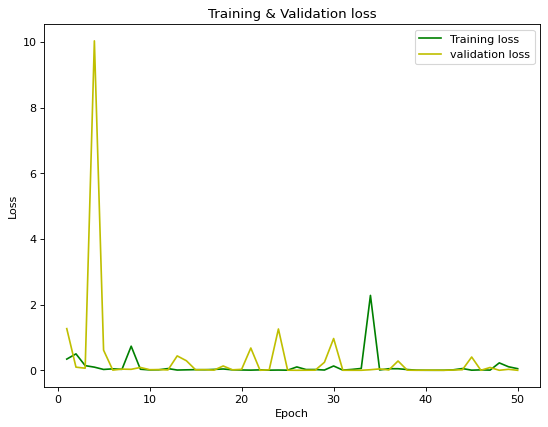

In [ ]:
from matplotlib.pyplot import figure
epochs = range(1, 51)
figure(figsize=(8, 6), dpi=80)
plt.plot(epochs, tloss, 'g', label='Training loss')
plt.plot(epochs, vloss, 'y', label='validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
torch.save(model, 'ANN10.pth')

In [ ]:
import itertools

y_pred_list = []

saved_model = torch.load('ANN10.pth')
saved_model.eval()

with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = saved_model(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

# takes arrays and makes them list of list for each batch
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
# flattens the lists in sequence
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))
y_true_test = test_y.values.ravel()

In [ ]:
def matrix(actual,predictions):
    accuracy = accuracy_score(actual,predictions)
    print('Accuracy: %f' % accuracy)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(actual,predictions)
    print('F1 score: %f' % f1)
    # precision tp / (tp + fp)
    precision = precision_score(actual,predictions)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(actual,predictions)
    print('Recall: %f' % recall)
    print('-------------------------')
    print ("Accuracy : " , accuracy_score(actual,predictions)*100)
    print("F1 Score : ",f1_score(actual, predictions, average='macro'))
    print("Report : \n", classification_report(actual, predictions))
    conf_mat = confusion_matrix(actual, predictions)
    print("\n\nConfusion matrix : \n", conf_mat)
    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

Accuracy: 0.984344
F1 score: 0.917241
Precision: 0.917241
Recall: 0.917241
-------------------------
Accuracy :  98.43444227005871
F1 Score :  0.9542979230845672
Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1388
           1       0.92      0.92      0.92       145

    accuracy                           0.98      1533
   macro avg       0.95      0.95      0.95      1533
weighted avg       0.98      0.98      0.98      1533



Confusion matrix : 
 [[1376   12]
 [  12  133]]


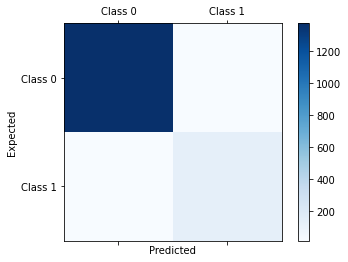

In [ ]:
matrix(y_true_test ,ytest_pred)

In [ ]:
df = pd.DataFrame(list(zip(y_true_test, ytest_pred)),
               columns =['Actual_Val', 'Predicted_val'])

df.head()

,Actual_Val,Predicted_val
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [ ]:
df.iloc[35:40]

,Actual_Val,Predicted_val
35,0,0.0
36,1,1.0
37,0,0.0
38,0,0.0
39,0,0.0


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.7 MB/s 


In [ ]:
import shap

In [ ]:
features_name_list = data.columns.drop("SCL_Label")

In [ ]:
e = shap.GradientExplainer(saved_model, x_tensor)
shap_values = pd.DataFrame(e.shap_values(xtest_tensor), columns=features_name_list)

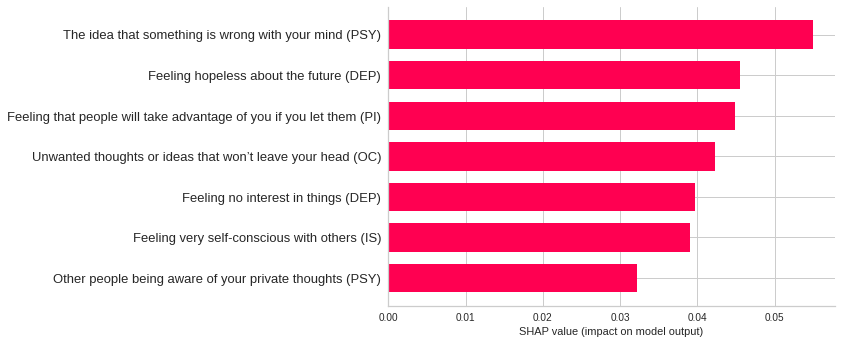

In [ ]:
shap.bar_plot(e.shap_values(xtest_tensor)[36], feature_names=features_name_list)
              # for sample record no.6 features Occupation & Town Country are positively effecting the output where as SCL_35, Title, SCL_90, SCL_84, SCL_63 are negatively effecting

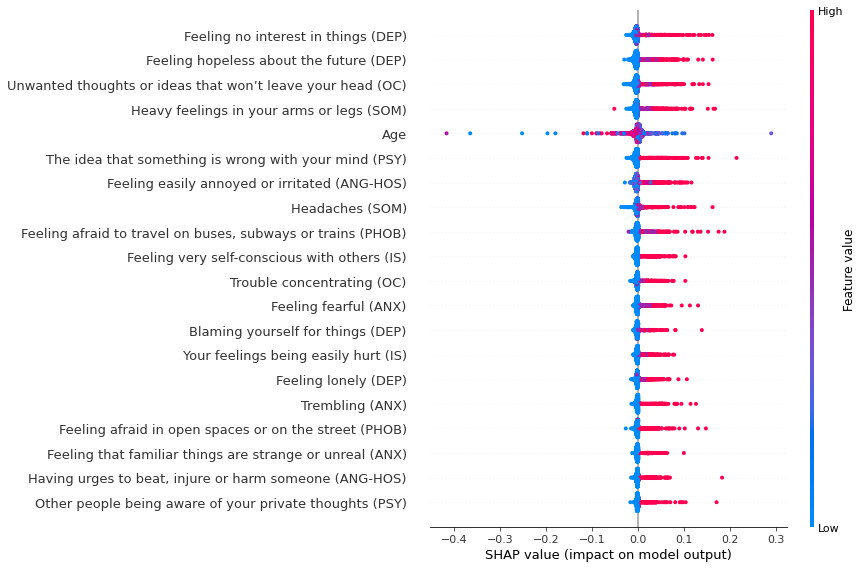

In [ ]:
shap.summary_plot(e.shap_values(xtest_tensor), feature_names=features_name_list, features = xtest_tensor)